In [181]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import scipy.stats as stats

rc("font", **{"family": "Times"})
rc("text", usetex=True)
# plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.dpi']= 150

x_sorted = torch.load("pr_rcp85_land-cpm_birmingham-64_2.2km-coarsened-4x-2.2km-coarsened-4x_01_1hr_flattened_sorted.pt").numpy()
y = torch.load("samples.pt", map_location=torch.device('cpu'))

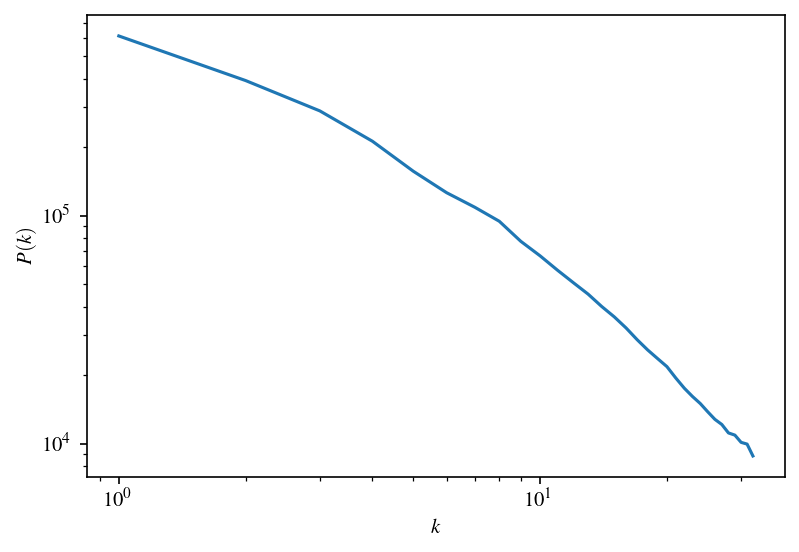

In [182]:
npix = 64

y = y.reshape(-1, npix, npix)

fourier_image = np.fft.fftn(y, axes = (1, 2))
fourier_amplitudes = np.abs(fourier_image) ** 2

kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0] ** 2 + kfreq2D[1] ** 2)
knrm = knrm.flatten()

kbins = np.arange(0.5, npix // 2 + 1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])

Abins, _, _ = stats.binned_statistic( 
    knrm,
    fourier_amplitudes.reshape(-1, npix * npix), 
    statistic = "mean",
    bins = kbins
)
Abins *= np.pi * (kbins[1:] ** 2 - kbins[:-1] ** 2)
Abins = np.mean(Abins, axis = 0)

plt.figure(figsize=(6, 4))
plt.loglog(kvals, Abins)
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.show()